In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from top2vec import Top2Vec
from wordcloud import WordCloud
from matplotlib import font_manager
from collections import Counter
from IPython.display import set_matplotlib_formats

In [13]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# 마이너스 깨짐 설정
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

# 화면 설정
set_matplotlib_formats('retina')

In [14]:
June= pd.read_excel('./dataset/NewsResult_20200601-20200630.xlsx')
July= pd.read_excel('./dataset/NewsResult_20200701-20200731.xlsx')
August= pd.read_excel('./dataset/NewsResult_20200801-20200831.xlsx')
September= pd.read_excel('./dataset/NewsResult_20200901-20200930.xlsx')
October= pd.read_excel('./dataset/NewsResult_20201001-20201029.xlsx')

In [15]:
daylist_June= June[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_July= July[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_August= August[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_September= September[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))
daylist_October= October[['일자','키워드']].groupby('일자').apply(lambda d: ",".join(d['키워드']))

In [16]:
daylist_total= pd.concat([daylist_June, daylist_July, daylist_August, daylist_September, daylist_October])

In [17]:
day= int(input("yyyymmdd형태로 날짜를 입력하세요: "))

yyyymmdd형태로 날짜를 입력하세요: 20201001


In [33]:
model = Top2Vec(documents=October['키워드'].to_list(), speed="learn", workers=5)
topic_sizes, topic_nums = model.get_topic_sizes()
print(topic_sizes)
print(topic_nums)

[216 135 104 101  94  92  87  82  77  75  68  64  64  62  60  59  54  53
  53  52  51  50  49  44  44  44  43  42  40  39  36  35  35  34  32  32
  32  31  31  30  28  28  27  25  25  25  22  22  21  21  20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [34]:
model.get_topics()

(array([['북서쪽', '영서', '올가', ..., '대구', '초미세먼지', '예년'],
        ['단풍', '절정', '산행', ..., '한라산', '공원', '얼음'],
        ['홍수', '수자원공사', '수해', ..., '대책', '기본', '촉구'],
        ...,
        ['대청호', '수역', '조류', ..., '유입', '인력', '구역'],
        ['지진', '기상청', '장비', ..., '수온', '현행', '교체'],
        ['태화강', '부양', '등재', ..., '낙동강', '복원', '감안']], dtype='<U7'),
 array([[0.9246, 0.9034, 0.8921, ..., 0.5405, 0.5404, 0.54  ],
        [0.8813, 0.8623, 0.8535, ..., 0.4247, 0.4245, 0.4233],
        [0.797 , 0.7641, 0.75  , ..., 0.4508, 0.4426, 0.4417],
        ...,
        [0.8533, 0.7861, 0.7591, ..., 0.2805, 0.2785, 0.2773],
        [0.8214, 0.5751, 0.5077, ..., 0.2602, 0.2598, 0.2577],
        [0.9257, 0.9197, 0.9183, ..., 0.3103, 0.3098, 0.3094]]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]))

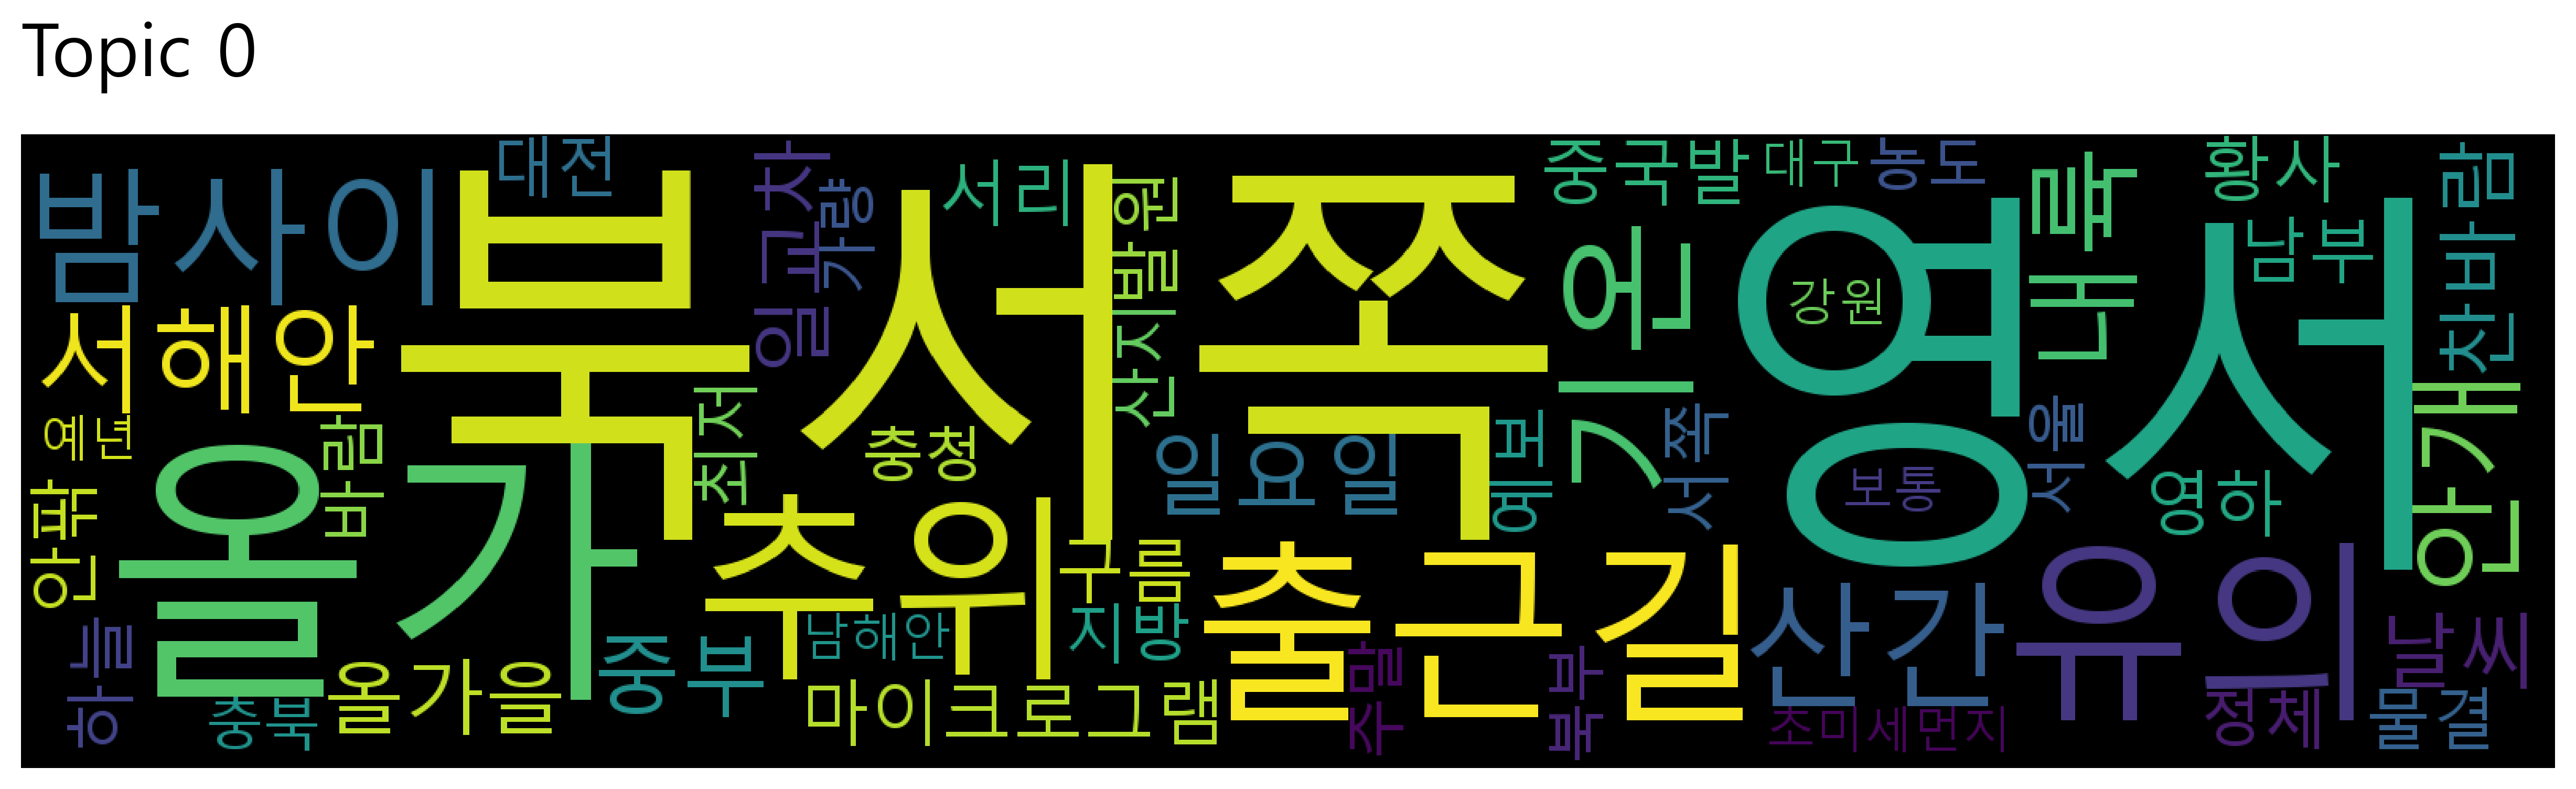

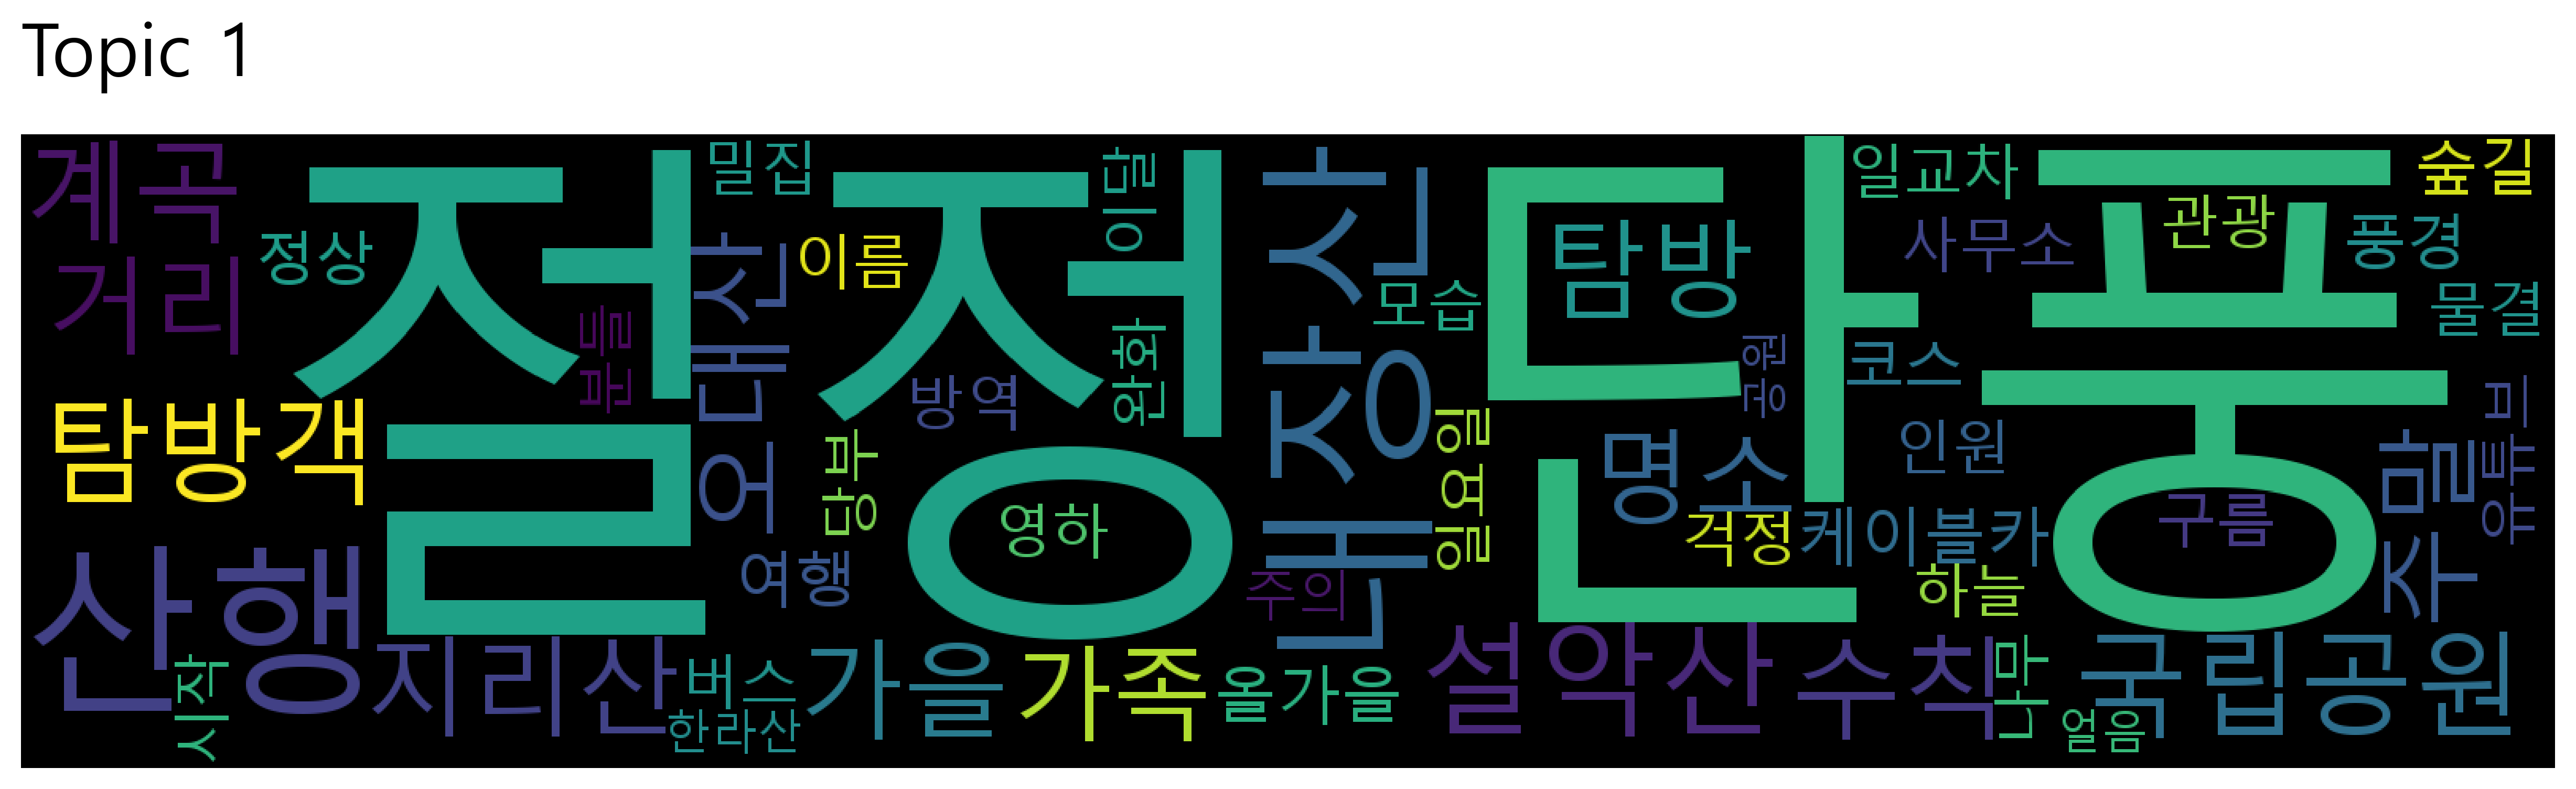

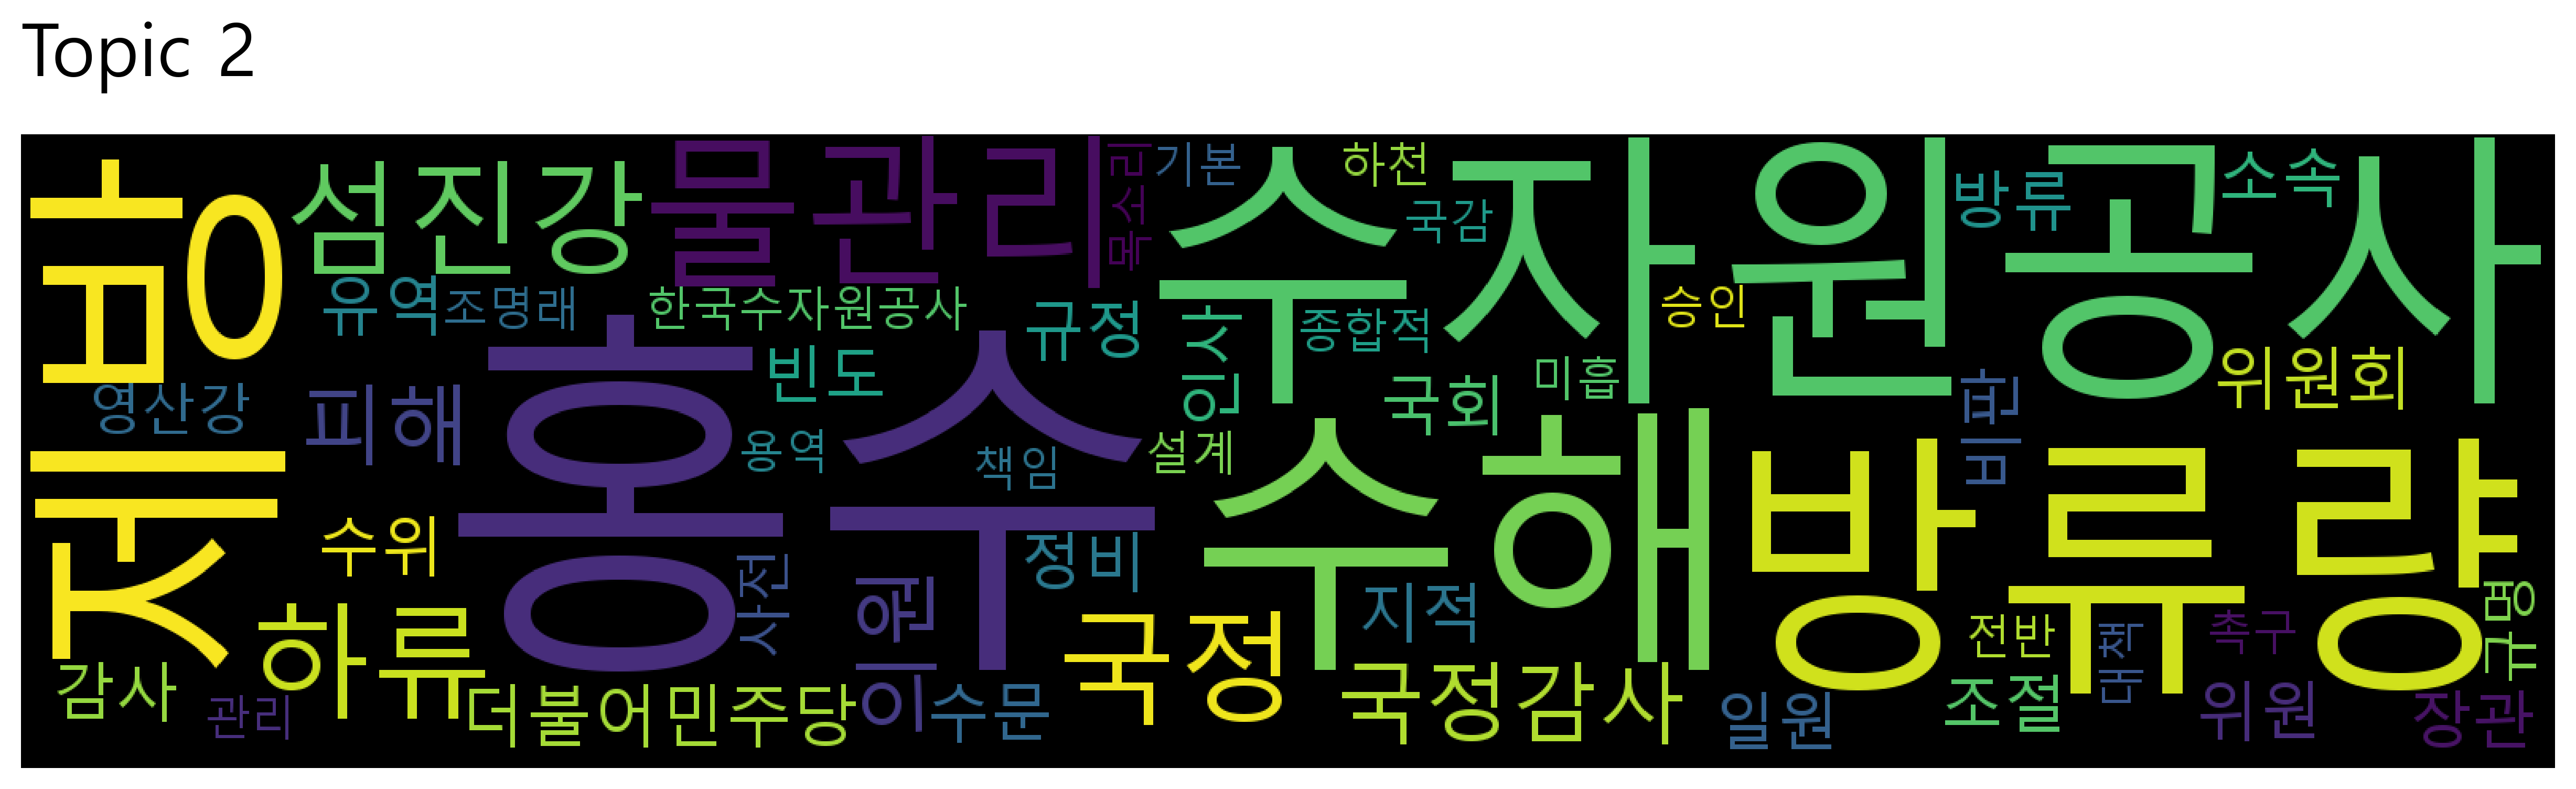

In [35]:
for topic in topic_nums[:3]:
    model.generate_topic_wordcloud(topic)

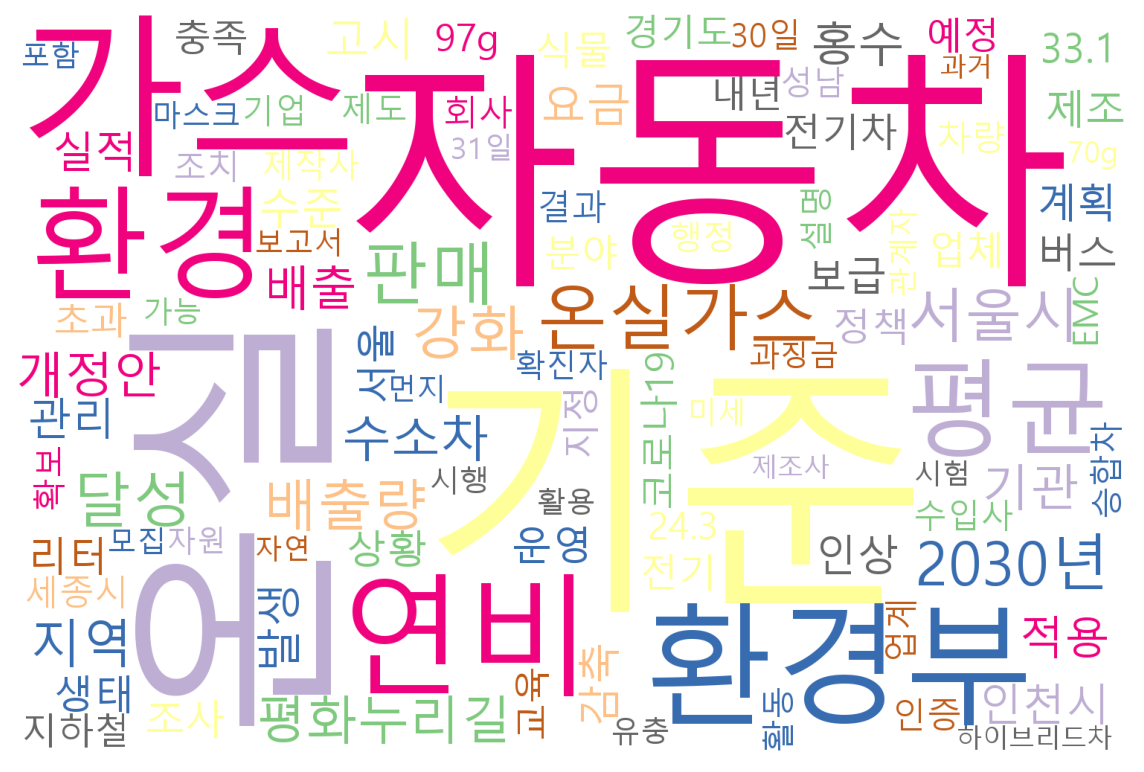

In [10]:
day= 20201001

keywords= dict(Counter(daylist_total[day].split(",")).most_common(100))
wordcloud = WordCloud(font_path = 'C:/GmarketSansTTFMedium.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(keywords) 
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()